# Importing the Necessary Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [28]:
import io
%cd "C:\Users\sande\OneDrive\Desktop\New folder (2)"

C:\Users\sande\OneDrive\Desktop\New folder (2)


# Loading the Dataset

In [29]:
flighttest=pd.read_excel("flighttest.xlsx")

In [30]:
flighttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [31]:
flighttest.shape

(2671, 10)

In [32]:
flighttrain=pd.read_excel("flighttrain.xlsx")

In [33]:
flighttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [34]:
flighttrain.shape

(10683, 11)

# EDA [Exploratory Data Analysis]

# Checking for Null values

In [35]:
null_features = flighttrain.isnull().sum()
null_features[null_features>0]

Route          1
Total_Stops    1
dtype: int64

In [36]:
flighttrain[(flighttrain['Route'].isnull()) | (flighttrain['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


# Checking for Duplicates

In [37]:
flighttrain[flighttrain.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [38]:
# Removing the duplicates values by keeping first records

flighttrain.drop_duplicates(keep = 'first',inplace=True)

In [39]:
flighttrain.shape

(10463, 11)

# Feature Engineering

In [40]:
# Will check for data_of_Journey

flighttrain.Date_of_Journey.dtype

dtype('O')

In [41]:
flighttrain.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [42]:
flighttrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [43]:
# will check 1 records to know how the data looks like
flighttrain.Date_of_Journey[0]

'24/03/2019'

# Now we can Extract only date from the Date_of_Journey

In [44]:
flighttrain['Date'] = pd.to_datetime(flighttrain.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [45]:
flighttrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


# Now we can Extract only Month from the Date of Journey

In [46]:
flighttrain['Month'] = pd.to_datetime(flighttrain.Date_of_Journey,format = "%d/%m/%Y").dt.month

# Now we can Extract only Year from the Date of Journey

In [47]:
flighttrain['Year'] = pd.to_datetime(flighttrain.Date_of_Journey,format = "%d/%m/%Y").dt.year

In [48]:
flighttrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [49]:
flighttrain.drop('Date_of_Journey',axis=1,inplace=True)

In [50]:
flighttrain.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


# Departure Time

# Similar to Date_of_Journey we can extract values for hours and as well as minutes for Departure Time

In [51]:
flighttrain['Dep_Time'].dtype

dtype('O')

In [52]:
flighttrain.Dep_Time[0]

'22:20'

# Now will extract hours from the dep_time

In [53]:
flighttrain['Dep_hour'] = pd.to_datetime(flighttrain.Dep_Time).dt.hour

# Now will extract Minutes from the dep_time

In [54]:
flighttrain['Dep_minutes'] = pd.to_datetime(flighttrain.Dep_Time).dt.minute

In [55]:
flighttrain.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [56]:
flighttrain.drop(['Dep_Time'],axis = 1,inplace=True)

In [57]:
flighttrain.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [58]:
flighttrain.Arrival_Time[:10]

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object

# Arrival Time

# Similar to dep_time we can extract the hr mins in arival time

In [59]:
# Extracting hours from the arival time
flighttrain['Arrival_hour'] = pd.to_datetime(flighttrain.Arrival_Time).dt.hour

In [60]:
# Extracting minutes from the arival time
flighttrain['Arrival_minutes'] = pd.to_datetime(flighttrain.Arrival_Time).dt.minute

In [61]:
# Dropping Arrival_Time 
flighttrain.drop(['Arrival_Time'],axis = 1,inplace=True)

In [62]:
flighttrain.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [63]:
flighttrain['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10463, dtype: object

In [64]:
flighttrain['Duration'][0].split()

['2h', '50m']

In [65]:
a = flighttrain['Duration'][0]

In [66]:
int(a.split('m')[0].split()[-1])

50

In [67]:
duration = list(flighttrain['Duration'])


for i in range(len(duration)):
    
    if len(duration[i].split())  !=2:    # To check if the duration is having only hours or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'       # if the mins is not present i am adding 0m
        else:
            duration[i] = '0h ' + duration[i]               # if the hr is not present i will add 0h
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split('h')[0]))
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))

In [68]:
# Adding duration hours and duration mins in dataframe

flighttrain['Duration_hours'] = duration_hours
flighttrain['Duration_mins'] = duration_mins

In [69]:
flighttrain.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [70]:
# Now let me remove duration column

flighttrain.drop('Duration',axis=1,inplace=True)

In [71]:
flighttrain.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [72]:
# Most Busiest Routes

flighttrain.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

# Delhi to Cochin via Mumbai as Busiest Routes wiht 2376 which is fallowed by Banglore to Delhi.

# So Let me Drop Routes information because it will leads to multicolinearity (where 2 independent features are related to eachother or giving same information(Routes&Total stops))

In [73]:
flighttrain.drop('Route',axis=1,inplace=True)

In [74]:
flighttrain.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


# Now will do some analysis for those categorical features

In [75]:
df_categorical_features = flighttrain.select_dtypes(include='object')

In [76]:
import seaborn as sns

In [77]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

# Now will perform catplot for all the categorical features

Airline


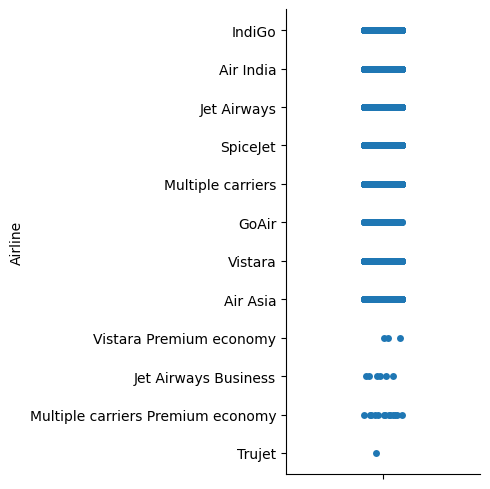

Source


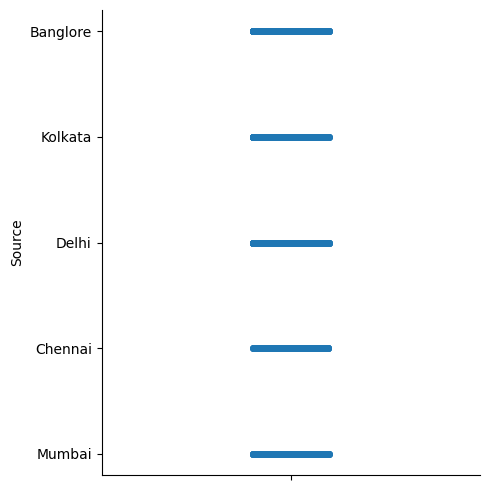

Destination


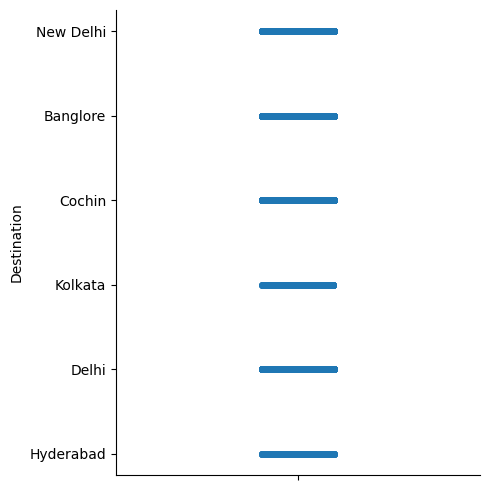

Total_Stops


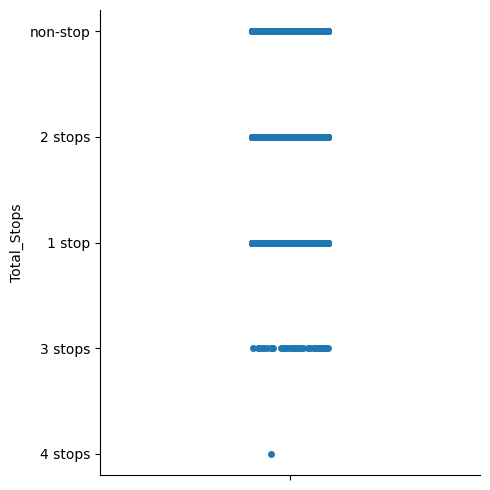

Additional_Info


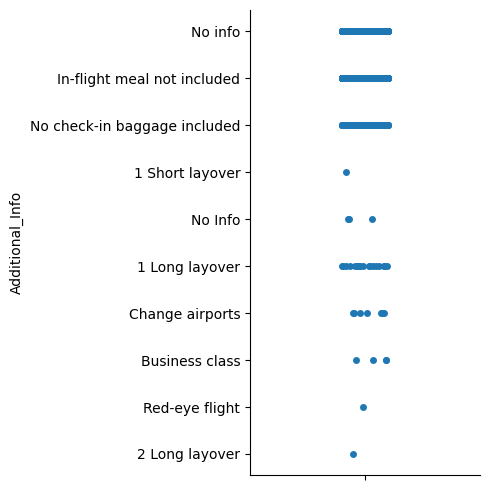

In [78]:
for i in df_categorical_features.columns:
    print(i)
    sns.catplot(flighttrain[i])
    plt.xticks(rotation = 90)
    plt.show()

# Now will compare the categorical features with Price column and will understand how it is impacting the price column

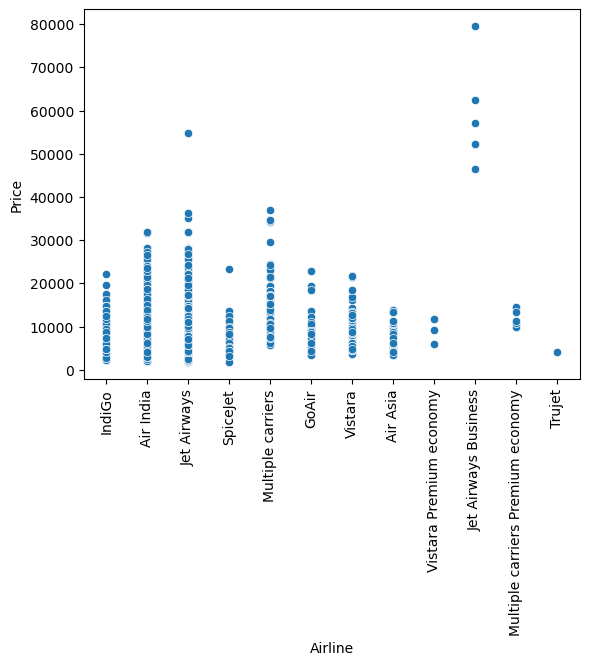

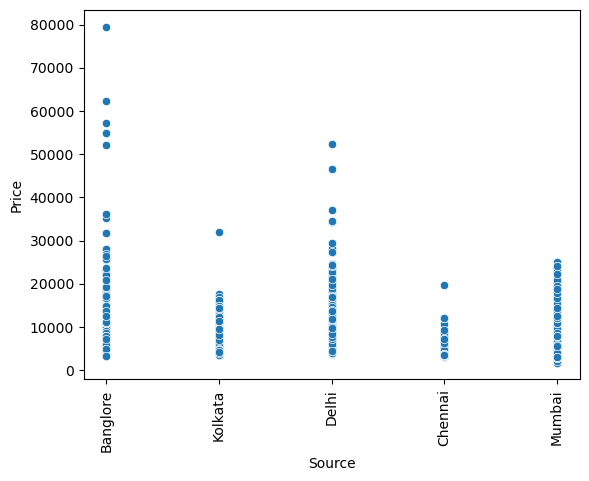

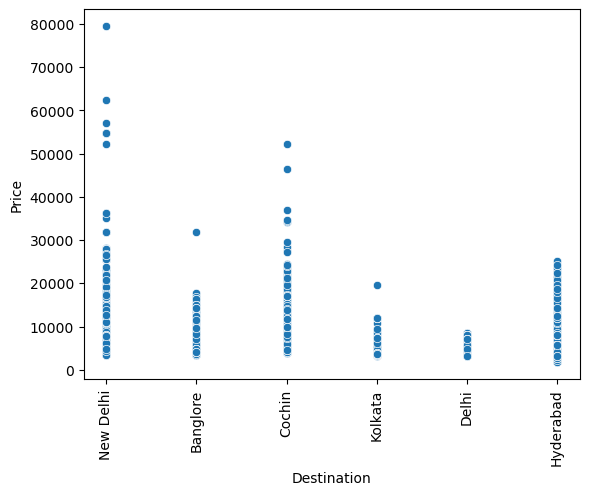

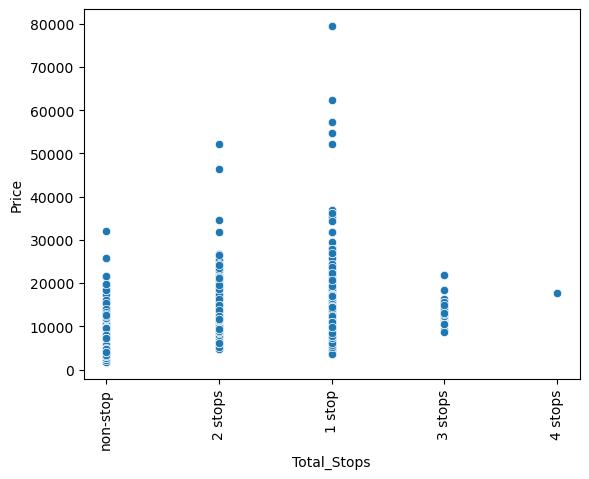

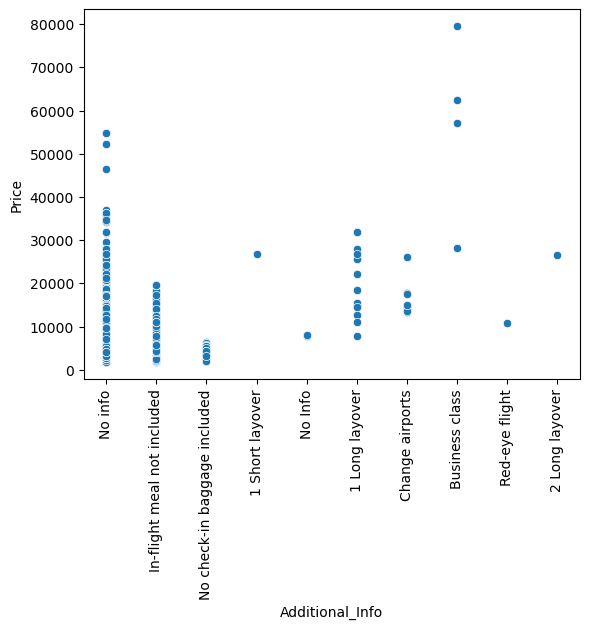

In [79]:
for i in df_categorical_features:
    sns.scatterplot(x = flighttrain[i],y=flighttrain['Price'])
    plt.xticks(rotation = 90)
    plt.show()

In [80]:
flighttrain.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [81]:
flighttrain.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [82]:
flighttrain.shape

(10463, 15)

In [83]:
flighttrain = flighttrain.dropna()

In [84]:
flighttrain.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_minutes        0
Arrival_hour       0
Arrival_minutes    0
Duration_hours     0
Duration_mins      0
dtype: int64

In [85]:
flighttrain.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [86]:
# Now will perform encoding to convert categorical data in to numbers

flighttrain.replace({'non-stop':0,'2 stops': 2,'1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [87]:
flighttrain.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [88]:
flighttrain.Additional_Info.value_counts(normalize=True)*100

No info                         78.206844
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
No Info                          0.028675
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [89]:
flighttrain.drop('Additional_Info',axis=1,inplace=True)

# Now i will be backuping the data

In [90]:
train_data_backup = flighttrain.copy(deep=True)

In [91]:
# All the columns are nominal data so we are going to perfrom dummies 

flighttrain = pd.get_dummies(flighttrain,drop_first = True)

In [92]:
flighttrain.shape

(10462, 31)

# Seperate Dependent and Independent Variable

In [93]:
X = flighttrain.drop('Price',axis=1)
y = flighttrain['Price']

In [94]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (10462, 30), Dependent Features Shape = (10462,)


# Performing Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression 

In [98]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [99]:
mse_train = mean_squared_error(y_train,y_train_pred)

In [100]:
mse_test = mean_squared_error(y_test,y_test_pred)

In [101]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [102]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  2893.706979163004
rmse_test =  2620.9880263761584


In [103]:
r2_score(y_train,y_train_pred)

0.6185110349883294

In [104]:
r2_score(y_test,y_test_pred)

0.6410430557741906

# DecisionTree

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)

DecisionTreeRegressor()

In [107]:
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)

In [108]:
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)

In [109]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [110]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  2893.706979163004
rmse_test =  2620.9880263761584


In [111]:
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)

In [112]:
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9710739336696111
test_score =  0.6875053306466332


# RandomForest

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

In [116]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [117]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [118]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  1017.4128024333678
rmse_test =  1836.9902349092392


In [119]:
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)

In [120]:
print('train_score = ',train_score)
print('test_score = ',test_score)

train_score =  0.9528407083789528
test_score =  0.8236700919994816


# So my Random Forest model is giving me the highest accuracy. Hence I'll performing hypertuning techniques on this model

In [121]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,600,100)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,100]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5,10]

In [122]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [123]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [124]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0)

In [125]:
# best Parameter
rf_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 29}

In [126]:
RF = RandomForestRegressor(n_estimators = 100,min_samples_split = 10,min_samples_leaf =2,max_features ='auto',max_depth = 29)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1507.8827135148547
rmse_test =  1686.6949194331391
train_score =  0.8964123450577131
test_score =  0.8513430017439301
